# `AA Workshop 7` — Coding Challenge

Complete the tasks below to practice implementing classification modeling from `W7_Classification_Basic.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- implementing an SVM classifier
- understanding evaluation metrics such as precision recall curves

## Task 1 - Detecting Forged Banknotes

To practice implementing a support vector machine classification model, we will use a well-known dataset containing data extracted from images that were taken from genuine and forged banknote-like specimens. You can find the raw data as `BankNote_Authentication.csv` in the `data` directory. Familiarize yourself with the data [via this link](https://archive.ics.uci.edu/dataset/267/banknote+authentication). 
- Load and inspect the data. Create a pairplot to do so.
- Train an SVM model (using `LinearSVC`) using all available features. 
- Properly evaluate model performance using accuracy, precision and recall. To do so, a simple two-way split suffices as we are not tuning hyper-parameters.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# load and inspect data
data = pd.read_csv("../data/BankNote_Authentication.csv")

data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
# inspect class imbalance
data["class"].value_counts(normalize=True)

class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

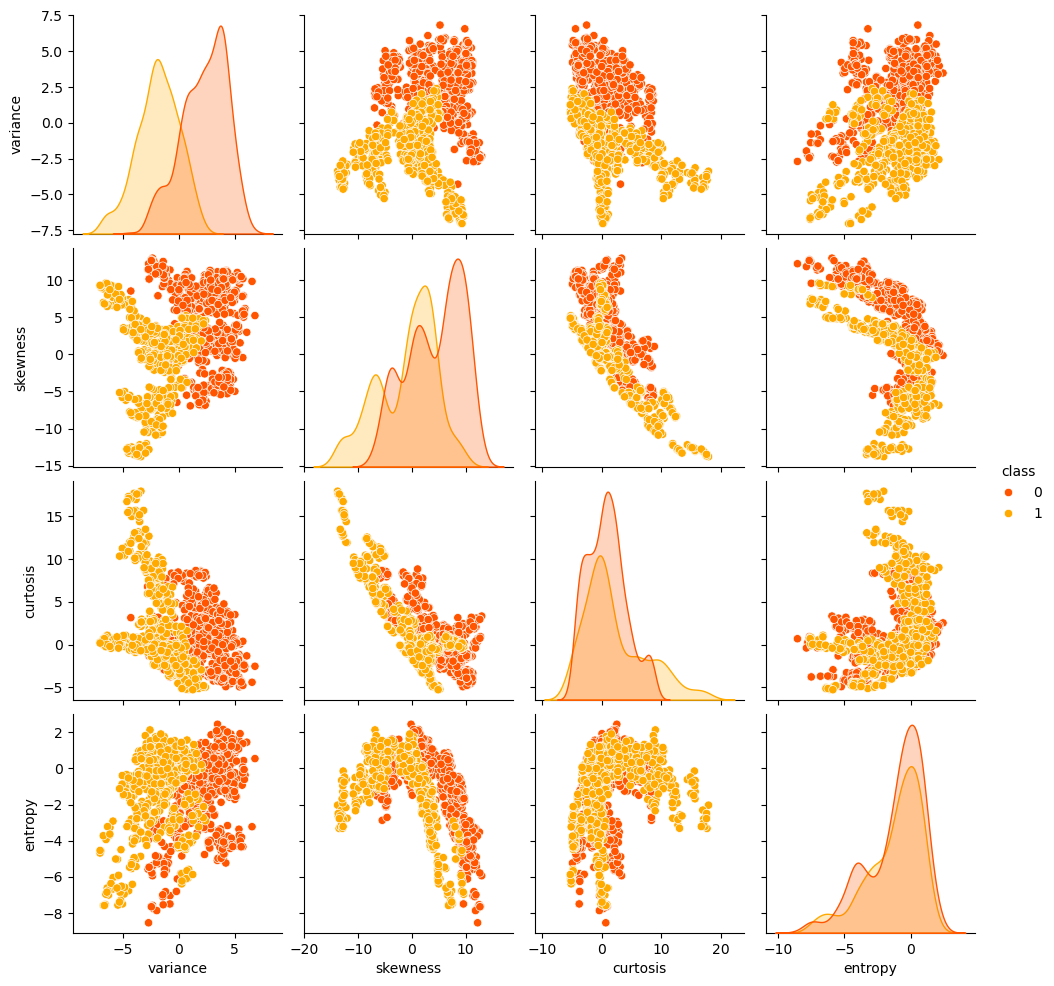

In [3]:
# create pair plot
sns.pairplot(data, hue = "class", palette = 'autumn')
plt.show()

In [4]:
# define features and target
X = data.drop("class", axis=1).values
y = data["class"].values

In [5]:
# perform train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test))

960 412


In [6]:
# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# train model
model = LinearSVC(max_iter=10000,loss="hinge")
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [8]:
# evaluate
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=[0,1]))
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Precision:\n", precision_score(y_test, y_pred, pos_label=1))
print("Recall:\n", recall_score(y_test, y_pred, pos_label=1))

Confusion Matrix:
 [[224   5]
 [  2 181]]
Accuracy:
 0.9830097087378641
Precision:
 0.9731182795698925
Recall:
 0.9890710382513661


## Task 2 - Understanding Precision-Recall Curves

You got to know several metrics to evaluate classifier performance. While accuracy, precision and recall are usually quite straightforward to interpret, ROC and Precision-Recall curves require a bit more thinking. In the notebook, we calculated the Precision-Recall Curve for our SVM model as follows:

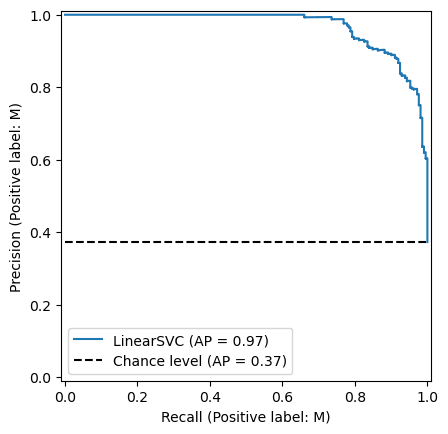

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# prepare data
cancer_df = pd.read_csv("../data/breast_cancer.csv", index_col = "id")
X = np.array(cancer_df[['area_mean','concave points_mean']])
Y = cancer_df['diagnosis'].values
norm = StandardScaler()
X_norm = norm.fit_transform(X)

# model
model_SVM = LinearSVC(loss='hinge')
model_SVM.fit(X_norm, Y)

# generate curve
PrecisionRecallDisplay.from_estimator(model_SVM, X_norm, Y, plot_chance_level=True)
plt.show()

**Question**: Why is the chance level precision not at 50% (like for ROC curves)? Does it have to do with the data or the model? First, figure out the reason, then try to re-create the plot but with a 50% chance level precision.

diagnosis
M    212
B    212
Name: count, dtype: int64


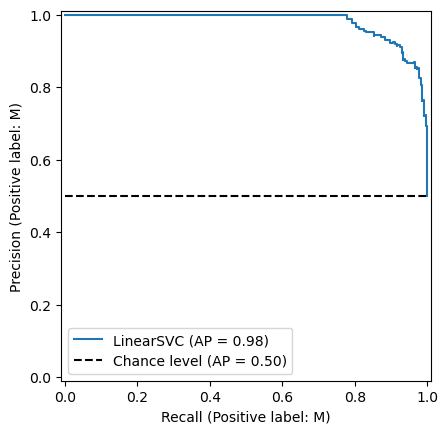

In [10]:
from sklearn.utils import resample

# define separate dataframes for each class
df_majority = cancer_df[cancer_df['diagnosis']=='B']
df_minority = cancer_df[cancer_df['diagnosis']=='M']

# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=len(df_minority),    # to match minority class
                                 random_state=42) # reproducible results

# combine downsampled majority class with minority class
cancer_df_sampled = pd.concat([df_minority, df_majority_downsampled])

# display new class counts
print(cancer_df_sampled.diagnosis.value_counts())

# fit model again
X_fake = np.array(cancer_df_sampled[['area_mean','concave points_mean']])
Y_fake = cancer_df_sampled['diagnosis'].values

norm = StandardScaler()
X_norm_fake = norm.fit_transform(X_fake)  # simultaneously fit and transform 

model_svm_fakedata = LinearSVC(loss='hinge', C=1)   # C is a regularization term, we set it to 1 here
model_svm_fakedata.fit(X_norm_fake, Y_fake)

# plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(model_svm_fakedata, X_norm_fake, Y_fake, plot_chance_level=True)
plt.show()